# Cotrain2

In [1]:
from functools import lru_cache
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from tqdm.notebook import tqdm

from mlflow_helper import retrieve, paired_ttest
retrieve = lru_cache(retrieve)
from cotrain_helper import MetaLearner, LevelOneData, meta_learn, get_metrics, retrieve_metrics
from paracoord_helper import parallel_coordinates_and_hist

%load_ext autoreload
%autoreload 2

/home/zeyusun/work/flare-prediction-smarp/arnet/constants.py:22: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  CONSTANTS = get_constants()


# sharp vs fused_sharp

In [2]:
%matplotlib inline

In [ ]:
for dataset in ['sharp', 'smarp']:
    other = 'smarp' if dataset == 'sharp' else 'sharp'
    for estimator_name in ['LSTM', 'CNN']:
        for seed in range(5):
            members = [
                f'ensemble/disjoint_train/{dataset}/{seed}/{estimator_name}',
                f'//fused_{dataset}//'
            ]
            axis_titles = [f'{estimator_name}_{dataset.upper()}',
                           f'{estimator_name}_{other.upper()}']
            levelone = LevelOneData(members, get_train=False)
            meta_learn(levelone, train=False, axis_titles=axis_titles, run_name='dataset')

In [ ]:
for estimator_name in ['LSTM', 'CNN']:
    for seed in range(5):
        levelone = LevelOneData([
            f'leaderboard3/val_tss/sharp/{seed}/{estimator_name}',
            f'//fused_sharp//'
        ])
        meta_learn(levelone, output_dir=None) #f'outputs/sharp_vs_fused_sharp/{estimator_name}_{seed}')

## LSTM + CNN

In [ ]:
for dataset_name in ['sharp', 'fused_sharp', 'smarp', 'fused_smarp']:
    for seed in range(5):
        members = [
            f'leaderboard3/val_tss/{dataset_name}/{seed}/LSTM',
            f'////CNN'
        ]
        levelone = LevelOneData(members, get_train=True)
        meta_learn(levelone, train=True, run_name='estimator')#, output_dir=None) #f'outputs/LSTM_vs_CNN/{dataset_name}_{seed}')

In [ ]:
for dataset_name in ['sharp', 'fused_sharp', 'smarp', 'fused_smarp']:
    for seed in range(5, 10):
        members = [
            f'leaderboard3/val_tss_2/{dataset_name}/{seed}/LSTM',
            f'////CNN'
        ]
        levelone = LevelOneData(members, get_train=True)
        meta_learn(levelone, train=True, run_name='estimator_2')#, output_dir=None) #f'outputs/LSTM_vs_CNN/{dataset_name}_{seed}')

## Collect results

In [50]:
runs = retrieve('stacking', 'dataset', p=None)

Select iloc slice(None, None, None) from 
                          start_time tags.mlflow.runName
0   2021-09-11 02:52:59.906000+00:00             dataset
1   2021-09-11 02:52:57.801000+00:00             dataset
2   2021-09-11 02:52:55.700000+00:00             dataset
3   2021-09-11 02:52:53.589000+00:00             dataset
4   2021-09-11 02:52:51.385000+00:00             dataset
..                               ...                 ...
135 2021-09-11 02:48:17.235000+00:00             dataset
136 2021-09-11 02:48:14.813000+00:00             dataset
137 2021-09-11 02:48:12.402000+00:00             dataset
138 2021-09-11 02:48:09.992000+00:00             dataset
139 2021-09-11 02:48:09.956000+00:00             dataset

[140 rows x 2 columns]


In [61]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.oracle_cross_entropy_over_best,metrics.auc_over_best,metrics.all_tss,metrics.all_oracle_hinge,...,params.experiment0,params.seed0,params.dataset0,params.estimator0,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.parentRunId,tags.mlflow.source.name,tags.mlflow.source.git.commit
0,8164f2bceeee411cb45bac4c52b51337,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:52:59.906000+00:00,2021-09-11 02:53:02.290000+00:00,-0.046490,-0.000904,0.777019,0.634801,...,ensemble,4,smarp,CNN,LOCAL,zeyusun,dataset,34ad173648df4a87ae1035cabd38bd27,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
1,9b2730b045c5497bb0181a479b7c575e,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:52:57.801000+00:00,2021-09-11 02:52:59.902000+00:00,0.000000,0.000375,0.777019,0.634801,...,ensemble,4,smarp,CNN,LOCAL,zeyusun,dataset,34ad173648df4a87ae1035cabd38bd27,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
2,0264357ab79741b58fb41a1e4c31df30,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:52:55.700000+00:00,2021-09-11 02:52:57.797000+00:00,-0.052612,-0.000776,0.777019,0.634801,...,ensemble,4,smarp,CNN,LOCAL,zeyusun,dataset,34ad173648df4a87ae1035cabd38bd27,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
3,48dd6c6b836e47f8820e0c57eb0e9e9f,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:52:53.589000+00:00,2021-09-11 02:52:55.696000+00:00,0.000000,0.000375,0.777019,0.634801,...,ensemble,4,smarp,CNN,LOCAL,zeyusun,dataset,34ad173648df4a87ae1035cabd38bd27,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
4,de2ecd00d32a4cea9153b3ce52f9ded9,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:52:51.385000+00:00,2021-09-11 02:52:53.585000+00:00,0.000000,-0.026486,0.777019,0.634801,...,ensemble,4,smarp,CNN,LOCAL,zeyusun,dataset,34ad173648df4a87ae1035cabd38bd27,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,32dcc2c6881c44fb9b55452cfcfabd90,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:48:19.609000+00:00,2021-09-11 02:48:21.806000+00:00,0.000000,-0.001939,0.936842,0.598837,...,ensemble,0,sharp,LSTM,LOCAL,zeyusun,dataset,10354ad4907f4e4ba634aef5e4da162d,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
135,d18eeaf6614449d3a60d05f79e661ada,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:48:17.235000+00:00,2021-09-11 02:48:19.605000+00:00,0.000000,-0.000988,0.936842,0.598837,...,ensemble,0,sharp,LSTM,LOCAL,zeyusun,dataset,10354ad4907f4e4ba634aef5e4da162d,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
136,334c2cb52f1642ca9894161dea7db2c9,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:48:14.813000+00:00,2021-09-11 02:48:17.231000+00:00,0.000000,-0.001939,0.936842,0.598837,...,ensemble,0,sharp,LSTM,LOCAL,zeyusun,dataset,10354ad4907f4e4ba634aef5e4da162d,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None
137,962efa7c213b46ae9150a87e9244e080,26,FINISHED,file:///home/zeyusun/work/flare-prediction-sma...,2021-09-11 02:48:12.402000+00:00,2021-09-11 02:48:14.808000+00:00,0.004562,-0.002023,0.936842,0.598837,...,ensemble,0,sharp,LSTM,LOCAL,zeyusun,dataset,10354ad4907f4e4ba634aef5e4da162d,/home/zeyusun/.conda/envs/arnet2/lib/python3.8...,None


In [67]:
df = (runs
 .loc[:, ['params.dataset0', 'params.estimator0', 'params.seed0', 'params.criterion', 'metrics.tss_over_best']]
 .set_index(['params.dataset0', 'params.estimator0', 'params.criterion', 'params.seed0'])
 .unstack(-1)
)
df = df.assign(p_val=[paired_ttest(x, np.zeros(5))[1] for x in df.values])
(df
 .style
 .background_gradient(subset=['p_val'])
 .background_gradient(subset=['metrics.tss_over_best'], cmap='coolwarm', vmin=-0.02, vmax=0.02)
)

## Stacking CNN and LSTM

In [3]:
runs = retrieve('stacking', 'FN_bug', p=None)

Select iloc slice(None, None, None) from 
                          start_time tags.mlflow.runName
140 2021-09-10 21:24:58.276000+00:00              FN_bug
141 2021-09-10 21:24:56.212000+00:00              FN_bug
142 2021-09-10 21:24:54.235000+00:00              FN_bug
143 2021-09-10 21:24:52.261000+00:00              FN_bug
144 2021-09-10 21:24:50.280000+00:00              FN_bug
..                               ...                 ...
275 2021-09-10 21:09:25.474000+00:00              FN_bug
276 2021-09-10 21:09:23.112000+00:00              FN_bug
277 2021-09-10 21:09:20.860000+00:00              FN_bug
278 2021-09-10 21:09:18.606000+00:00              FN_bug
279 2021-09-10 21:09:18.056000+00:00              FN_bug

[140 rows x 2 columns]


In [4]:
df = (runs
 .loc[:, ['params.dataset0', 'params.seed0', 'params.criterion', 'metrics.tss_over_best']]
 .set_index(['params.dataset0', 'params.criterion', 'params.seed0'])
 .unstack(-1))
(df
 .assign(p_val=[paired_ttest(x, np.zeros(5))[1] for x in df.values])
 .style
 .background_gradient(subset=['p_val'])
 .background_gradient(subset=['metrics.tss_over_best'], cmap='coolwarm', vmin=-0.02, vmax=0.02)
)

In [5]:
paired_ttest(runs.loc[
    (runs['params.dataset0'] == 'fused_sharp')
    & (runs['params.criterion'] == 'tss')
    #& (runs['params.seed0'] == 0)
    ,
    'metrics.tss_over_best'
].tolist(), np.zeros(5))

(0.8965116758295265, 0.21032907080100335)

In [6]:
runs_2 = retrieve('stacking', 'FN_bug_2', p=None)
runs_comb = pd.concat((runs, runs_2))

Select iloc slice(None, None, None) from 
                          start_time tags.mlflow.runName
0   2021-09-10 21:41:21.651000+00:00            FN_bug_2
1   2021-09-10 21:41:19.177000+00:00            FN_bug_2
2   2021-09-10 21:41:16.696000+00:00            FN_bug_2
3   2021-09-10 21:41:14.166000+00:00            FN_bug_2
4   2021-09-10 21:41:11.734000+00:00            FN_bug_2
..                               ...                 ...
135 2021-09-10 21:25:44.280000+00:00            FN_bug_2
136 2021-09-10 21:25:41.997000+00:00            FN_bug_2
137 2021-09-10 21:25:39.694000+00:00            FN_bug_2
138 2021-09-10 21:25:37.399000+00:00            FN_bug_2
139 2021-09-10 21:25:36.974000+00:00            FN_bug_2

[140 rows x 2 columns]


In [26]:
df = (runs_comb
 .loc[:, ['params.dataset0', 'params.seed0', 'params.criterion', 'metrics.tss_over_best']]
 .set_index(['params.dataset0', 'params.criterion', 'params.seed0'])
 .unstack(-1))
df
(df
 .assign(p_val=[paired_ttest(x, np.zeros(10))[1] for x in df.values])
 .style
 .background_gradient(subset=['p_val'])
 .background_gradient(subset=['metrics.tss_over_best'], cmap='coolwarm', vmin=-0.02, vmax=0.02)
)

In [30]:
rows = []
for (dataset, seed), subdf in runs_comb.groupby(['params.dataset0', 'params.seed0']):
    run_id = subdf['run_id'].iloc[0]
    spectrum = {
        'val': retrieve_metrics(run_id, 'all_tss'),
        'test': retrieve_metrics(run_id, 'all_oracle_tss'),
    }
    tss_LSTM = spectrum['test'][-1] # last alpha = 1 => LSTM
    tss_CNN = spectrum['test'][0]
    tss_AVG = np.mean([spectrum['test'][0], spectrum['test'][-1]])
    if spectrum['val'][-1] > spectrum['val'][0]:
        model_BEST = 'LSTM'
        tss_BEST = tss_LSTM
    else:
        model_BEST = 'CNN'
        tss_BEST = tss_CNN
        
    rows.extend([
        {
            'params.dataset0': dataset,
            'params.criterion': 'LSTM',
            'params.seed0': seed,
            'metrics.tss': tss_LSTM
        },
        {
            'params.dataset0': dataset,
            'params.criterion': 'CNN',
            'params.seed0': seed,
            'metrics.tss': tss_CNN
        },
        {
            'params.dataset0': dataset,
            'params.criterion': 'AVG',
            'params.seed0': seed,
            'metrics.tss': tss_AVG
        },
        {
            'params.dataset0': dataset,
            'params.criterion': 'BEST',
            'params.seed0': seed,
            'metrics.tss': tss_BEST,
            'model_BEST': model_BEST,
        },
    ])

In [79]:
# Note that for SMARP_ONLY, LSTM is always selected as BEST, so BEST ensemble = LSTM
_df = pd.DataFrame(rows)
_df = (_df
       [(_df['params.criterion'] == 'BEST')]
       .drop(columns='params.criterion')
       .set_index(['params.dataset0', 'params.seed0'])
       ['model_BEST']
       .unstack(-1)
      )
_df

params.seed0,0,1,2,3,4,5,6,7,8,9
params.dataset0,,,,,,,,,,
fused_sharp,LSTM,LSTM,LSTM,LSTM,LSTM,CNN,LSTM,CNN,CNN,LSTM
fused_smarp,LSTM,LSTM,LSTM,CNN,LSTM,LSTM,LSTM,LSTM,LSTM,CNN
sharp,LSTM,CNN,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM
smarp,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM,LSTM


In [31]:
columns = ['params.dataset0', 'params.seed0', 'params.criterion', 'metrics.tss', 'metrics.alpha']
df = pd.concat((runs_comb[columns], pd.DataFrame(rows)))
df

,params.dataset0,params.seed0,params.criterion,metrics.tss,metrics.alpha,model_BEST
140,fused_smarp,4,bss,0.855769,0.626263,NaN
141,fused_smarp,4,tss,0.828526,0.848485,NaN
142,fused_smarp,4,auc,0.838141,0.767677,NaN
143,fused_smarp,4,acc,0.828526,0.848485,NaN
144,fused_smarp,4,hinge,0.855769,0.000000,NaN
...,...,...,...,...,...,...
155,smarp,8,BEST,0.867069,NaN,LSTM
156,smarp,9,LSTM,0.821256,NaN,NaN
157,smarp,9,CNN,0.800322,NaN,NaN
158,smarp,9,AVG,0.810789,NaN,NaN


In [80]:
#All data
(df
 .set_index(['params.dataset0', 'params.criterion', 'params.seed0'])
 [['metrics.tss', 'metrics.alpha']]
 .unstack(-1)
)

metrics.tss                                \
params.seed0                               0         1         2         3   
params.dataset0 params.criterion                                             
fused_sharp     AVG                 0.835366  0.850926  0.915980  0.767355   
                BEST                0.882927  0.938889  0.911038  0.872420   
                CNN                 0.787805  0.762963  0.920923  0.662289   
                LSTM                0.882927  0.938889  0.911038  0.872420   
                acc                 0.892683  0.935185  0.922570  0.864916   
                auc                 0.880488  0.887037  0.919275  0.864916   
                bss                 0.868293  0.931481  0.919275  0.866792   
                cross_entropy       0.865854  0.931481  0.919275  0.863039   
                hinge               0.787805  0.938889  0.911038  0.662289   
                tss                 0.892683  0.935185  0.922570  0.864916   
fused_smarp     AVG                 0.813341  0.833483  0.834123  0.839716   
                BEST                0.812780  0.845601  0.838863  0.835886   
                CNN                 0.813901  0.821364  0.829384  0.835886   
                LSTM                0.812780  0.845601  0.838863  0.843545   
                acc                 0.817265  0.863555  0.838863  0.839168   
                auc                 0.812780  0.860862  0.862559  0.835886   
                bss                 0.826233  0.850987  0.850711  0.845733   
                cross_entropy       0.818386  0.860862  0.859005  0.839168   
                hinge               0.813901  0.821364  0.838863  0.835886   
                tss                 0.817265  0.863555  0.838863  0.839168   
sharp           AVG                 0.863415  0.873148  0.849259  0.821764   
                BEST                0.848780  0.824074  0.861614  0.834897   
                CNN                 0.878049  0.824074  0.836903  0.808630   
                LSTM                0.848780  0.922222  0.861614  0.834897   
                acc                 0.892683  0.859259  0.873147  0.842402   
                auc                 0.885366  0.824074  0.869852  0.838649   
                bss                 0.885366  0.824074  0.871499  0.846154   
                cross_entropy       0.885366  0.868519  0.869852  0.844278   
                hinge               0.878049  0.824074  0.836903  0.834897   
                tss                 0.892683  0.859259  0.873147  0.842402   
smarp           AVG                 0.743834  0.814632  0.825829  0.803063   
                BEST                0.801570  0.826750  0.856635  0.817287   
                CNN                 0.686099  0.802513  0.795024  0.788840   
                LSTM                0.801570  0.826750  0.856635  0.817287   
                acc                 0.801570  0.833932  0.855450  0.854486   
                auc                 0.802691  0.828546  0.856635  0.847921   
                bss                 0.801570  0.826750  0.864929  0.855580   
                cross_entropy       0.806054  0.832136  0.855450  0.854486   
                hinge               0.801570  0.826750  0.795024  0.788840   
                tss                 0.801570  0.833932  0.855450  0.854486   

                                                                          \
params.seed0                             4         5         6         7   
params.dataset0 params.criterion                                           
fused_sharp     AVG               0.860927  0.885759  0.877020  0.875975   
                BEST              0.890728  0.881064  0.915619  0.851794   
                CNN               0.831126  0.881064  0.838420  0.851794   
                LSTM              0.890728  0.890454  0.915619  0.900156   
                acc               0.918874  0.890454  0.915619  0.911076   
                auc               0.927152  0.906103  0.915619  0.9141

In [84]:
criteria = ['CNN', 'LSTM', 'AVG', 'BEST', #'hinge',
            'cross_entropy', 'bss', 'auc', 'tss']
sorter = dict(zip(criteria, range(len(criteria))))
df_renamed = (df
              .rename(columns={
                  'metrics.tss': 'TSS',
                  'metrics.alpha': 'alpha',
                  'params.dataset0': 'Dataset',
                  'params.criterion': 'Criterion',
              })
              .replace({'Dataset': {
                  'fused_sharp': 'FUSED_SHARP',
                  'fused_smarp': 'FUSED_SMARP',
                  'sharp': 'SHARP_ONLY',
                  'smarp': 'SMARP_ONLY',
              }})
              .replace({'Criterion': {c: c.upper() for c in criteria}})
              .assign(sorter=df['params.criterion'].map(sorter))
              [df['params.criterion'].isin(criteria)] # after assign since the assigned series has to have the same length
              .sort_values(by=['Dataset', 'sorter', 'params.seed0'])
             )
df_renamed

,Dataset,params.seed0,Criterion,TSS,alpha,model_BEST,sorter
1,FUSED_SHARP,0,CNN,0.787805,NaN,NaN,0.0
5,FUSED_SHARP,1,CNN,0.762963,NaN,NaN,0.0
9,FUSED_SHARP,2,CNN,0.920923,NaN,NaN,0.0
13,FUSED_SHARP,3,CNN,0.662289,NaN,NaN,0.0
17,FUSED_SHARP,4,CNN,0.831126,NaN,NaN,0.0
...,...,...,...,...,...,...,...
64,SMARP_ONLY,5,TSS,0.740741,0.919192,NaN,7.0
57,SMARP_ONLY,6,TSS,0.743392,0.676768,NaN,7.0
50,SMARP_ONLY,7,TSS,0.768564,0.666667,NaN,7.0
43,SMARP_ONLY,8,TSS,0.867069,0.636364,NaN,7.0


In [85]:
fig = px.box(
    df_renamed,
    y='TSS',
    x='Dataset',
    color='Criterion',
    #facet_col='Dataset',
    #x=list(reversed(['LSTM', 'CNN', 'BEST', 'AVG', 'tss'])),
    #points='all',
)
fig.update_layout(
    width=1500,
    height=400,
)
fig.write_image('stacking.png', scale=2)
fig = go.FigureWidget(fig)
fig

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Criterion=CNN<br>Datase…

In [130]:
is_stacking = df_renamed['Criterion'].isin([
    c.upper() for c in ['cross_entropy', 'bss', 'auc', 'tss']])
fig = px.box(
    df_renamed[is_stacking],
    y='alpha',
    x='Dataset',
    color='Criterion',
    color_discrete_sequence=px.colors.qualitative.Plotly[4:],
    #facet_col='Dataset',
    #x=list(reversed(['LSTM', 'CNN', 'BEST', 'AVG', 'tss'])),
    points='all',
)
for trace in fig.data:
    trace.marker.size = 4
fig.update_layout(
    width=1500,
    height=400,
    yaxis_title=r'$\alpha$'
)
fig.write_image('stacking_weights.png', scale=2)
fig = go.FigureWidget(fig)
fig

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'boxpoints': 'all',
              'hovert…

In [ ]:
parallel_coordinates_and_hist(
    df, dimensions=[c for c in df.columns if c != 'run_id'],
    color='metrics.tss',
    color_hist='best_model')

## Request via REST API

In [48]:
dataset = 'smarp'
criterion = 'tss'
seed = '3'

df = runs_comb.loc[
    (runs_comb['params.dataset0'] == dataset)
    & (runs_comb['params.criterion'] == criterion)
    ,
    ['run_id', 'params.seed0', 'metrics.all_tss', 'metrics.all_oracle_tss', 'metrics.alpha', 'metrics.tss_over_best']
].sort_values('params.seed0').reset_index(drop=True)
df

,run_id,params.seed0,metrics.all_tss,metrics.all_oracle_tss,metrics.alpha,metrics.tss_over_best
0,b3a430c765da42599c701b193bfd67d1,0,0.817442,0.801570,1.000000,0.000000
1,d6912fe84e984f1994f0c4cc25fdf071,1,0.730318,0.826750,0.484848,0.007181
2,584ca12fe094488cb7aa2e958154071e,2,0.773676,0.856635,0.959596,-0.001185
3,9abfed9f006944dd82e9395b90a68171,3,0.869792,0.817287,0.616162,0.037199
4,4e5cf31cd2ec430691ac973b5d6a8f98,4,0.835040,0.790064,0.838384,0.022436
5,6475c61757f54acc926613862ba12264,5,0.862117,0.729901,0.919192,0.010840
6,c5786e424f304abfb1e68afc2fc0c1d7,6,0.838083,0.719163,0.676768,0.024229
7,76dfe0bd8d9f44da84cec4528d15717c,7,0.825095,0.772277,0.666667,-0.003713
8,073ce53f17694391865b8d1b6da54322,8,0.790541,0.867069,0.636364,0.000000
9,51a8de2f105245e98384a6208d56a150,9,0.795048,0.821256,0.494949,0.016103


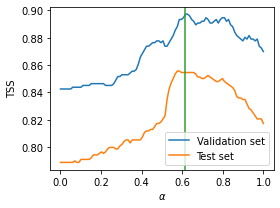

In [49]:
import requests
for i in range(len(df)):
    if df['params.seed0'].iloc[i] != seed:
        continue
    run_id = df['run_id'].iloc[i]
    all_tss = retrieve_metrics(run_id, 'all_tss')
    all_oracle_tss = retrieve_metrics(run_id, 'all_oracle_tss')
    alpha = retrieve_metrics(run_id, 'alpha')[0]

    alphas = np.linspace(0, 1, 100)
    plt.figure(figsize=(4, 3))
    plt.plot(alphas, all_tss, label='Validation set')
    plt.plot(alphas, all_oracle_tss, label='Test set')
    plt.axvline(x=alpha, c='C2')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('TSS')
    #plt.ylim([0.80, 0.97])
    plt.legend()
    plt.savefig('alpha.png', bbox_inches='tight')
    plt.show()

## Analysis

In [8]:
df_merged = levelone.dfs[0]['test'].rename(columns={'prob': 'prob0'})
df_merged['prob1'] = levelone.dfs[1]['test']['prob']
fig = parallel_coordinates_and_hist(df_merged, dimensions=df_merged.columns)
fig

FigureWidget({
    'data': [{'dimensions': [{'label': 'Unnamed: 0', 'values': array([   0,    1,    2, ..., 10…

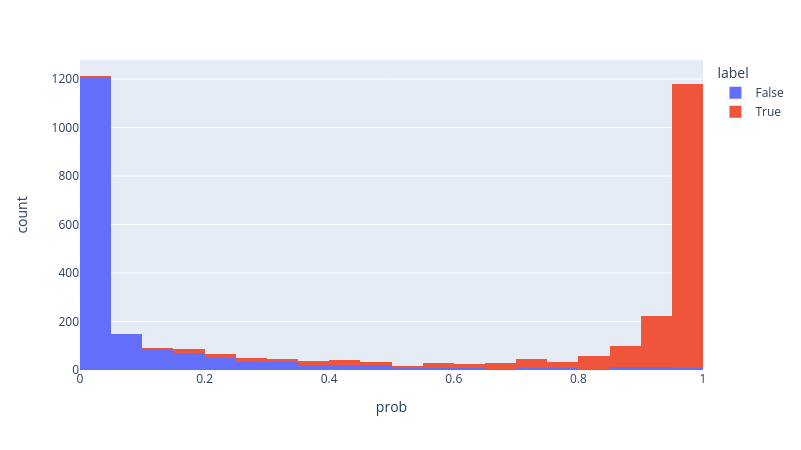

In [92]:
px.histogram(levelone_estimator.dfs[0]['train'], x='prob', color='label')

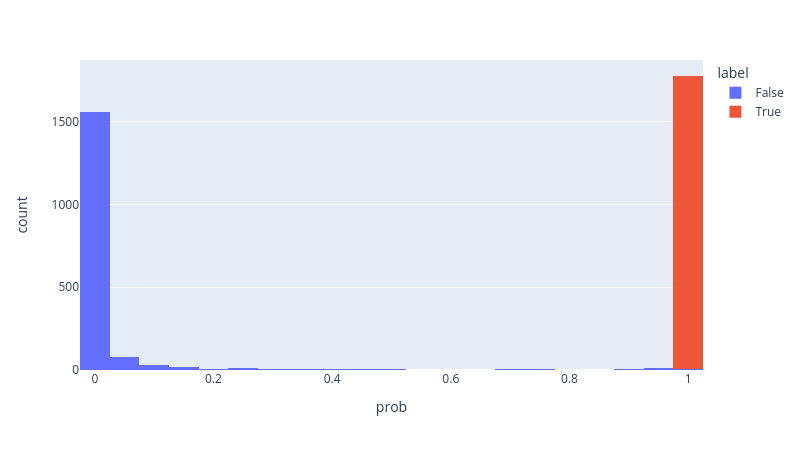

In [93]:
px.histogram(levelone_estimator.dfs[1]['train'], x='prob', color='label')

In [14]:
levelone.dfs[0]['test']

,Unnamed: 0,prefix,arpnum,t_start,t_end,label,flares,bad_img_idx,HEIGHT,WIDTH,SUM,SUM_SQR,FLARE_INDEX,AREA,USFLUXL,MEANGBL,R_VALUE,prob
0,0,HARP,248,2010-11-08 00:00:00,2010-11-09 00:00:00,False,NaN,[],34,103,-5333.812012,27933330.0,0.0,1284.245239,2.014390e+21,23.310,-0.094560,0.001193
1,1,HARP,248,2010-11-08 22:24:00,2010-11-09 22:24:00,False,NaN,[-3],34,103,-4789.600098,22136648.0,0.0,1094.282593,1.721627e+21,20.872,1.937432,0.010798
2,2,HARP,248,2010-11-09 11:12:00,2010-11-10 11:12:00,False,NaN,[-11],34,103,-9448.128906,18421932.0,0.0,999.286865,1.658027e+21,19.743,2.253890,0.015937
3,3,HARP,256,2010-11-19 00:00:00,2010-11-20 00:00:00,False,NaN,[],63,139,106718.414062,87779440.0,0.0,2553.202637,4.876131e+21,22.311,2.342165,0.059428
4,4,HARP,259,2010-11-18 01:36:00,2010-11-19 01:36:00,False,NaN,[],107,168,26244.960938,138329792.0,0.0,4374.967285,8.609388e+21,19.524,2.914287,0.256552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,1061,HARP,7435,2020-08-08 16:00:00,2020-08-09 16:00:00,False,NaN,"[-6, -5]",63,86,571.394531,16438748.0,0.0,1150.096313,1.444228e+21,16.754,-0.094560,0.000866
1062,1062,HARP,7435,2020-08-09 04:48:00,2020-08-10 04:48:00,False,NaN,"[-14, -13]",63,86,-2555.041016,12950649.0,0.0,921.806824,1.161829e+21,15.786,-0.094560,0.000669
1063,1063,HARP,7466,2020-11-04 06:24:00,2020-11-05 06:24:00,False,NaN,[-8],48,158,10137.506836,21172320.0,0.0,894.960205,1.302077e+21,22.761,1.614312,0.016882
1064,1064,HARP,7466,2020-11-04 20:48:00,2020-11-05 20:48:00,False,NaN,[],48,158,2082.096680,47618808.0,0.0,1516.034058,2.460054e+21,23.537,2.317181,0.040541
